# **CAR PRICE ANALYSIS**

## Objectives

The purpose of this notebook is to complete the ETL process and prepare dataset for analysis. The ETL pipeline steps include:
* Extract: load data from the dataset file
* Transform: clean the data, handle missing values, encode categorical variables, and create new features
* Load: store the transformed data in a format suitable for analysis

## Inputs

* The dataset for the current project is available for downloading at https://www.google.com/url?q=https://www.kaggle.com/datasets/hellbuoy/car-price-prediction&sa=D&source=editors&ust=1754747316598878&usg=AOvVaw3o_SpPOPPmvKaepESDsnOq

## Outputs

* Cleaned dataset file
* ETL Jupiter notebook documenting ETL proccesses


## Additional Comments

* No additional comments



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis'

# Setup

- Environment setup/Importing necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---

- Load data:

In [6]:
df = pd.read_csv('D:\\vscode-projects\\Projects\\Car_price_analysis\\Dataset\\raw\\cars.csv')

# Cleaning 

- Initial data inspection:

In [ ]:
df.head(5) # Display first 5 rows of the dataset

(205, 27)

- Check structure and data types:

In [8]:
df.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Basic summary stratistics:

In [9]:
df.describe() # Display statistical information about the DataFrame

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- List column names for inspection and transformation

In [10]:
df.columns # Display the columns of the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
# Renaming some of the  columns for better readability
df.rename(columns={
    'car_ID': 'car_id',
    'CarName':'car_name',
    'fueltype':'fuel_type',
    'doornumber':'door_number',
    'carbody': 'car_body',
    'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location',
    'wheelbase':'wheel_base',
    'carlength': 'car_length',
    'carwidth': 'car_width',
    'carheight': 'car_height',
    'curbweight': 'curb_weight',
    'enginetype': 'engine_type',
    'cylindernumber':'cylinder_number',
    'enginesize': 'engine_size',
    'fuelsystem':'fuel_system',
    'boreratio': 'bore_ratio',
    'compressionratio':'compression_ratio',
    'horsepower':'horse_power',
    'peakrpm':'peak_rpm',
    'citympg':'city_mpg',
    'highwaympg':'highway_mpg'
}, inplace=True)
df.head(5)


,car_id,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Check for missing values 

In [12]:
df.isnull().sum() # Check for missing values in each column

car_id               0
symboling            0
car_name             0
fuel_type            0
aspiration           0
door_number          0
car_body             0
drive_wheel          0
engine_location      0
wheel_base           0
car_length           0
car_width            0
car_height           0
curb_weight          0
engine_type          0
cylinder_number      0
engine_size          0
fuel_system          0
bore_ratio           0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

---

- Value distribution check for column 'car_name' as some discrepencies in naming noticed

In [13]:

print(df['car_name'].value_counts()) # Display the count of each unique value in the 'car_name' column


car_name
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


- Dividing the 'car_name' column into two new columns: 'car_brand' and 'car_model'

In [14]:
# Extracting the brand and model from car_name and displaying the count of each brand
# The new column 'brand' will contain the first word of the car_name, which is typically the brand name.
# The original column car_name consists of both brand and model in a single string which makes it difficult to analyze the data by brand.

df['model'] = df['car_name'].str.split(n=1).str[1] 
df['brand'] = df['car_name'].str.split().str[0].str.lower() 

df=df.copy() # Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.drop(columns=['car_name']) # dropping the car_name column as it is no longer needed

df['brand'].value_counts() 


brand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

- Correcting misspellings

In [15]:
# Correcting some common misspellings in the brand names

df['brand'] = df['brand'].replace({
    'maxda': 'mazda',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'toyouta': 'toyota',
    'alfa-romero': 'alfa romeo'
})
df['brand'].value_counts() # Display the count of each brand after correction

brand
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
jaguar         3
chevrolet      3
alfa romeo     3
renault        2
mercury        1
porcshce       1
Name: count, dtype: int64

- Re-check for null values after transformations

In [16]:
df.isnull().sum() # Check for missing values in each column after renaming and correcting brand names

car_id               0
symboling            0
fuel_type            0
aspiration           0
door_number          0
car_body             0
drive_wheel          0
engine_location      0
wheel_base           0
car_length           0
car_width            0
car_height           0
curb_weight          0
engine_type          0
cylinder_number      0
engine_size          0
fuel_system          0
bore_ratio           0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
model                2
brand                0
dtype: int64

- Fix null values 

In [17]:
df['model'] = df["model"].fillna('unknown') # Fill missing values in the 'model' column with 'unknown'

In [18]:
df['model'].isnull().sum() # Check for missing values in the 'model' column after filling

0

- Verify data types

In [19]:
df.dtypes # Display the data types of each column

car_id                 int64
symboling              int64
fuel_type             object
aspiration            object
door_number           object
car_body              object
drive_wheel           object
engine_location       object
wheel_base           float64
car_length           float64
car_width            float64
car_height           float64
curb_weight            int64
engine_type           object
cylinder_number       object
engine_size            int64
fuel_system           object
bore_ratio           float64
stroke               float64
compression_ratio    float64
horse_power            int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                float64
model                 object
brand                 object
dtype: object

- Checking unique values in categorical columns

In [20]:
# List of categorical columns that I want to check for unique values
columns = [
    'fuel_type', 'aspiration', 'door_number',
    'car_body', 'drive_wheel', 'engine_location',
    'engine_type', 'cylinder_number', 'fuel_system',
    'brand', 'model'
]

for col in columns:   
    unique_vals = df[col].unique() # Get unique values in the column
    print(f"Unique values in {col}: ({len(unique_vals)}): {unique_vals}, dtype: {df[col].dtype}") # Print unique values and their count for each column



Unique values in fuel_type: (2): ['gas' 'diesel'], dtype: object
Unique values in aspiration: (2): ['std' 'turbo'], dtype: object
Unique values in door_number: (2): ['two' 'four'], dtype: object
Unique values in car_body: (5): ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'], dtype: object
Unique values in drive_wheel: (3): ['rwd' 'fwd' '4wd'], dtype: object
Unique values in engine_location: (2): ['front' 'rear'], dtype: object
Unique values in engine_type: (7): ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'], dtype: object
Unique values in cylinder_number: (7): ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'], dtype: object
Unique values in fuel_system: (8): ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'], dtype: object
Unique values in brand: (23): ['alfa romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Explanation: Categorical columns do not need further transformation at this point.
Encoding will be done later, once it is clear which values are needed for visualisation.
The 'model' column has too many unique values (142), but the analysis will focus 
on brands, so individual model values research and validation is not necessary at the moment. 

- Summary statistics for numerical columns

In [21]:
df.describe().T # Transpose for better readability - in a table format

,count,mean,std,min,25%,50%,75%,max
car_id,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
car_length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
car_width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
car_height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore_ratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


- Outliar detection

In [22]:
# Check for outliers in all numeric columns

numeric_cols = df.select_dtypes(include=np.number).columns # list of numeric columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")



car_id: 0 outliers
symboling: 0 outliers
wheel_base: 3 outliers
car_length: 1 outliers
car_width: 8 outliers
car_height: 0 outliers
curb_weight: 0 outliers
engine_size: 10 outliers
bore_ratio: 0 outliers
stroke: 20 outliers
compression_ratio: 28 outliers
horse_power: 6 outliers
peak_rpm: 2 outliers
city_mpg: 2 outliers
highway_mpg: 3 outliers
price: 15 outliers


- Standardizing numeric columns for visualisation

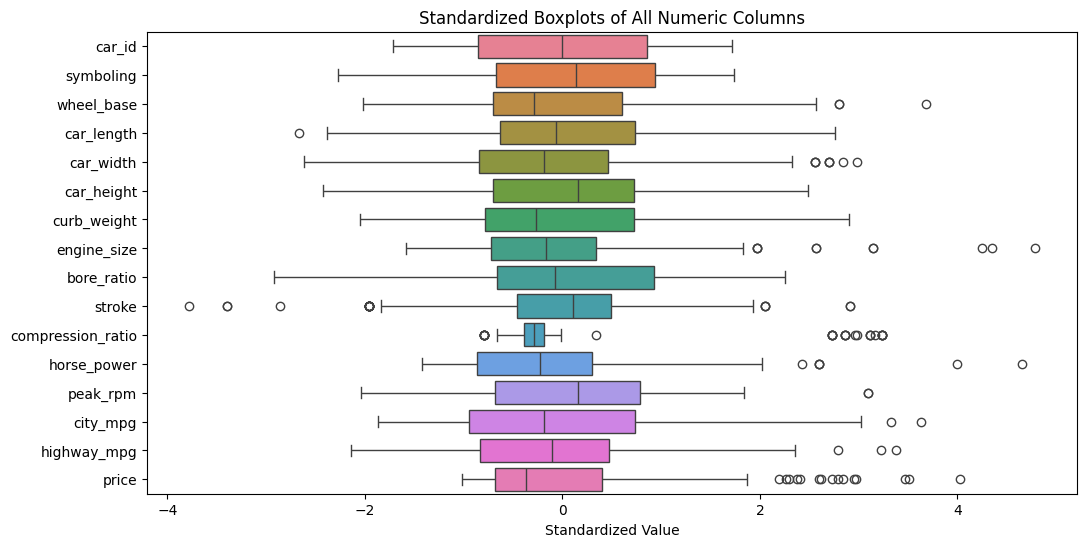

In [23]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Standardizing the numeric columns for better visualization
# How far each value is from the average in terms of standard deviation.
df_standardized = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized, orient="h")
plt.title("Standardized Boxplots of All Numeric Columns")
plt.xlabel("Standardized Value")
plt.show()


Explanation: For the purpose of the current project, a detailed examination of the meaning and impact of all car features included in the dataset is
beyond the present scope and will be left for future improvements. At this stage, I will focus only on columns with extreme outliers, 
which are clearly visible from the boxplot visualization—specifically, price, horse power, engine size, and stroke. This targeted approach 
ensures that the most influential and variable features are addressed, while a comprehensive feature analysis can be conducted in subsequent 
iterations of the project.

- Identify outliar values for inspection

In [24]:
outlier_cols = ['price', 'horse_power', 'engine_size', 'stroke'] # Columns to check for outliers
outlier_tables = []

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][[col]]
    outliers['feature'] = col
    outlier_tables.append(outliers)

# Combine all outlier tables into one and inspect
all_outliers = pd.concat(outlier_tables)
print(all_outliers)


       price      feature  horse_power  engine_size  stroke
15   30760.0        price          NaN          NaN     NaN
16   41315.0        price          NaN          NaN     NaN
17   36880.0        price          NaN          NaN     NaN
47   32250.0        price          NaN          NaN     NaN
48   35550.0        price          NaN          NaN     NaN
49   36000.0        price          NaN          NaN     NaN
70   31600.0        price          NaN          NaN     NaN
71   34184.0        price          NaN          NaN     NaN
72   35056.0        price          NaN          NaN     NaN
73   40960.0        price          NaN          NaN     NaN
74   45400.0        price          NaN          NaN     NaN
126  32528.0        price          NaN          NaN     NaN
127  34028.0        price          NaN          NaN     NaN
128  37028.0        price          NaN          NaN     NaN
129  31400.5        price          NaN          NaN     NaN
49       NaN  horse_power        262.0  

Explanation: Outliers in 'price', 'horse_power', and 'engine_size' may represent genuine variations in car models (luxury cars, sports engines or unusually 
large engines) and are therefore kept unchanged.
Outliers in 'stroke' may be due to rare engine designs or data entry errors.
After reviewing these values, they appear valid and do not require correction or removal.

## Save cleaned data

In [25]:
df.to_csv('D:/vscode-projects/Projects/Car_price_analysis/Dataset/clean/cars_clean.csv', index=False) # Save the cleaned DataFrame

NOTES:

* All required python packages (pandas, numpy,seaborn,matplotlib)  must be installed before running this notebook
* Notebook cells should be run swquentially from the top to bottom to avoid errors 
* Outliars in some key features are identified but not removed as they may be valid values
* Further feature-engineering may be needed in the second stage of visualisation
* This analysis focus is on cleaning initial data and its exploration
* Please refer to README file for more information

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [26]:
import os
try:
    # Example: create a folder named 'output'
    os.makedirs('output', exist_ok=True)
    print("Folder 'output' created or already exists.")
except Exception as e:
    print(e)


Folder 'output' created or already exists.
